In [13]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.signal import periodogram


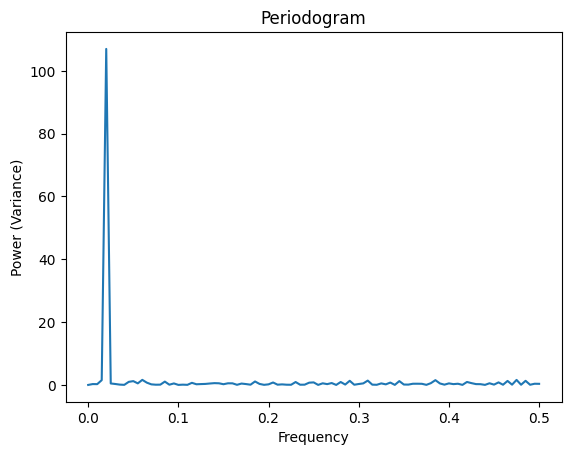

In [14]:

# 1. Create dummy data with a hidden cycle
# A signal with a 50-day cycle (frequency = 1/50 = 0.02)
time = np.arange(0, 200)
signal = np.sin(2 * np.pi * 0.02 * time) + np.random.normal(0, 0.5, 200)

# 2. Calculate Periodogram (uses FFT under the hood)
frequencies, power = periodogram(signal)

# 3. Plot
plt.figure()
plt.plot(frequencies, power)
plt.title("Periodogram")
plt.xlabel("Frequency") # Peak should be at 0.02
plt.ylabel("Power (Variance)")
plt.show()

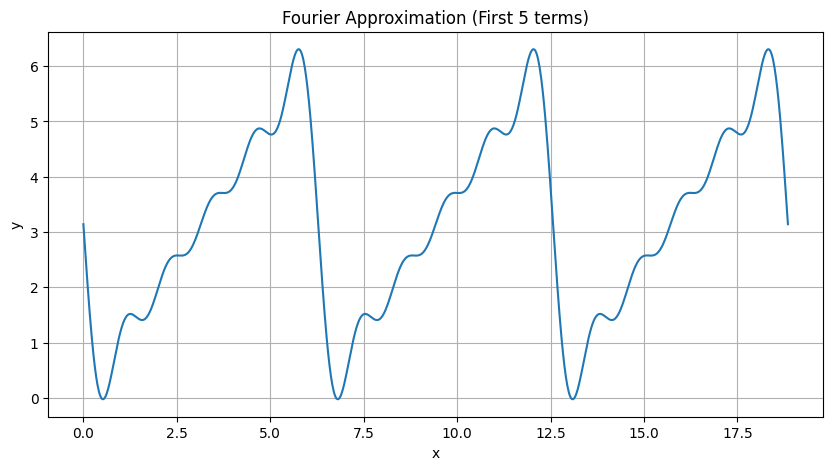

In [15]:
# 1. Define a function to evaluate the series
# This sums up the cosine and sine terms [cite: 1474]
def evaluate_fourier(x, a, b, c):
    ret = np.zeros(len(x))
    # Add cosine terms
    for i in range(0, len(a)):
        ret = ret + a[i] * np.cos((i + 1) * x)
    # Add sine terms
    for i in range(0, len(b)):
        ret = ret + b[i] * np.sin((i + 1) * x)
    return ret + c

# 2. Setup the coefficients
# These specific numbers create a "sawtooth" wave shape [cite: 1490]
n = 100
a = np.zeros(n)              # No cosine terms
iVals = np.arange(0, n)
b = -2 / (iVals + 1)         # Sine coefficients decrease as 1/n
c = math.pi

# 3. Plotting
# We create a grid of x values [cite: 1514]
x = np.linspace(0, 6 * math.pi, 1000)

# We calculate the wave using the first 5 terms
y = evaluate_fourier(x, a[0:5], b[0:5], c)

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.title("Fourier Approximation (First 5 terms)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()